# Vanishing Gradient Problem in Artificial Neural Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons

## Data Loading, Preprocessing and Visualization

In [118]:
X, y = make_moons(n_samples=250, random_state=42, noise=0.05)

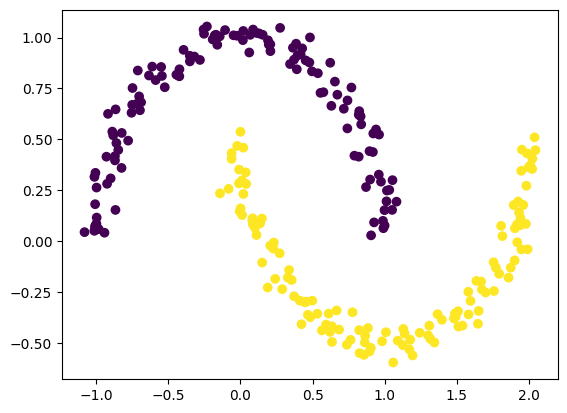

In [119]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [120]:
X.shape

(250, 2)

## Model Training and Evaluation

### Model with Sigmoid Activation

In [142]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [143]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,031 (4.03 KB)

 Trainable params: 1,031 (4.03 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.get_weights()

[array([[ 0.2492494 , -0.01476675,  0.58785814, -0.18116033, -0.6930567 ,
          0.18448973, -0.42288983,  0.4038412 ,  0.09267586, -0.07123405],
        [ 0.18619263,  0.25681573,  0.4814853 , -0.31834137,  0.66758496,
          0.39535898, -0.6141623 ,  0.00452554, -0.61302185,  0.00381225]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.35349143,  0.18858117,  0.3717047 , -0.29657108, -0.25506327,
         -0.33870986,  0.14985996,  0.1536504 ,  0.4988804 ,  0.28310114],
        [ 0.5433705 , -0.06737831,  0.49442196, -0.40429562, -0.50667953,
         -0.21977586, -0.4714723 , -0.09743336, -0.5385364 , -0.2657996 ],
        [-0.34642798,  0.2218309 ,  0.0240804 ,  0.06327242,  0.50485325,
          0.40463227, -0.12279812, -0.09358391, -0.24203691,  0.5203419 ],
        [ 0.22602588, -0.48313466, -0.5358    ,  0.35131443,  0.10936314,
         -0.02221966, -0.28930297, -0.4131865 ,  0.1699161 , -0.17918777],
        [ 0.16612

In [145]:
old_weights = model.get_weights()[0]

In [146]:
old_weights

array([[ 0.2492494 , -0.01476675,  0.58785814, -0.18116033, -0.6930567 ,
         0.18448973, -0.42288983,  0.4038412 ,  0.09267586, -0.07123405],
       [ 0.18619263,  0.25681573,  0.4814853 , -0.31834137,  0.66758496,
         0.39535898, -0.6141623 ,  0.00452554, -0.61302185,  0.00381225]],
      dtype=float32)

In [147]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [148]:
history = model.fit(X,y, epochs=1000,verbose=0)

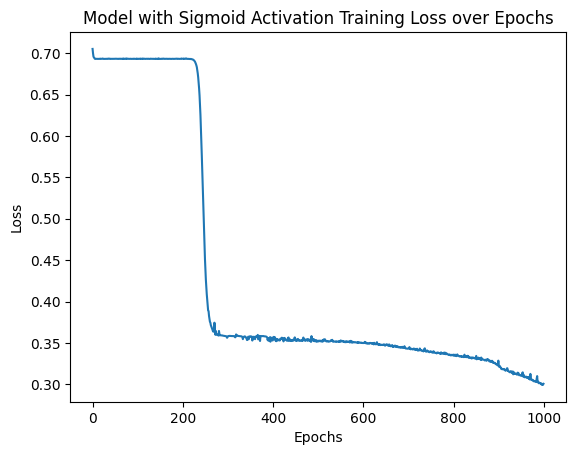

In [149]:
plt.plot(history.history['loss'])
plt.title('Model with Sigmoid Activation Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [150]:
new_weights = model.get_weights()[0]

In [151]:
print(f"Old weights:\n{old_weights}\n")
print(f"New weights:\n{new_weights}\n")

Old weights:
[[ 0.2492494  -0.01476675  0.58785814 -0.18116033 -0.6930567   0.18448973
  -0.42288983  0.4038412   0.09267586 -0.07123405]
 [ 0.18619263  0.25681573  0.4814853  -0.31834137  0.66758496  0.39535898
  -0.6141623   0.00452554 -0.61302185  0.00381225]]

New weights:
[[ 0.15201132 -0.36014155  0.3661817   0.01931172 -0.45093745  0.07695026
  -0.32814693  0.30597878  0.20860244  0.2980611 ]
 [ 0.96419364  2.0062811  -1.1349167  -1.2798489   2.4401891  -0.5602269
   0.9121617  -1.3221588  -1.6532646   0.5935018 ]]



In [152]:
percent_change = abs((new_weights - old_weights) / old_weights) * 100
percent_change

array([[3.9012363e+01, 2.3388677e+03, 3.7709175e+01, 1.1066002e+02,
        3.4934986e+01, 5.8290218e+01, 2.2403683e+01, 2.4232897e+01,
        1.2508820e+02, 5.1842505e+02],
       [4.1784735e+02, 6.8121429e+02, 3.3571158e+02, 3.0203662e+02,
        2.6552490e+02, 2.4170082e+02, 2.4852129e+02, 2.9315479e+04,
        1.6969098e+02, 1.5468268e+04]], dtype=float32)

### Model with ReLU Activation

In [153]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [154]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,031 (4.03 KB)

 Trainable params: 1,031 (4.03 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
old_weights = model.get_weights()[0]

In [156]:
old_weights

array([[ 0.02896535, -0.5647602 ,  0.3670451 ,  0.04502702,  0.64062244,
         0.16420597,  0.2732839 ,  0.5871796 ,  0.36170763,  0.46355695],
       [ 0.7064547 ,  0.433523  ,  0.61629325, -0.28210014,  0.17938876,
        -0.7065944 ,  0.16366667, -0.09293294,  0.09351695, -0.69708866]],
      dtype=float32)

In [157]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [158]:
history = model.fit(X,y, epochs=1000, verbose=0)

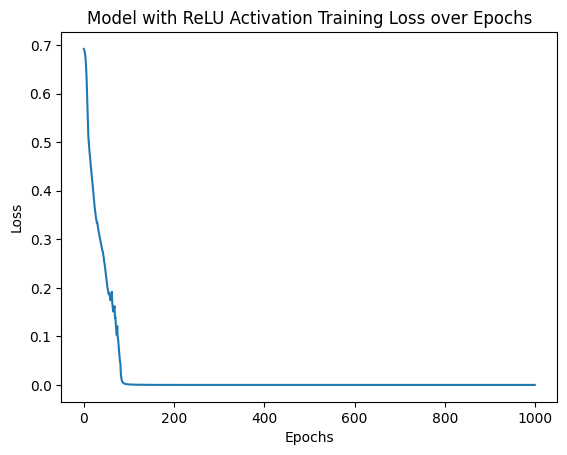

In [159]:
plt.plot(history.history['loss'])
plt.title('Model with ReLU Activation Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [160]:
new_weights = model.get_weights()[0]

In [161]:
print(f"Old weights:\n{old_weights}\n")
print(f"New weights:\n{new_weights}\n")

Old weights:
[[ 0.02896535 -0.5647602   0.3670451   0.04502702  0.64062244  0.16420597
   0.2732839   0.5871796   0.36170763  0.46355695]
 [ 0.7064547   0.433523    0.61629325 -0.28210014  0.17938876 -0.7065944
   0.16366667 -0.09293294  0.09351695 -0.69708866]]

New weights:
[[-0.06178066 -0.89770746  0.31026968  0.1248918   0.70198065  0.19522837
   0.3728393   0.6066112   0.31414148  0.54054207]
 [ 0.7799845   0.39517382  0.6905718  -0.26469702  0.25115266 -1.1119688
   0.20973799 -0.34301344  0.12892796 -0.8637758 ]]



In [162]:
diff_percent = abs((new_weights - old_weights) / old_weights) * 100
diff_percent

array([[313.29156  ,  58.95374  ,  15.468242 , 177.37079  ,   9.577906 ,
         18.89237  ,  36.4293   ,   3.3093095,  13.15044  ,  16.60748  ],
       [ 10.408279 ,   8.84594  ,  12.052466 ,   6.169131 ,  40.004684 ,
         57.370163 ,  28.149483 , 269.0978   ,  37.86588  ,  23.911898 ]],
      dtype=float32)